In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import glob
import corner, emcee, tqdm
from tweezepy import AV, PSD, MLE
import os

In [2]:
folderPath2 = "c:\\Users\\maddr\\OneDrive\\Documents\\MTCode\\Magnetic-Tweezers\\Data\\October\\6\\2\\dataTSV"


fileList = glob.glob(folderPath2 + '/*.txt')
concatDF = pd.DataFrame(pd.read_table(fileList[0],names=['inf','zMotor', 'rotmotor', 
                                                         'xRefBead1', 'yRefBead1', 'zRefBead1', 
                                                         'xRefBead2', 'yRefBead2', 'zRefBead2',
                                                         'xExpBead1','yExpBead1','zExpBead1',
                                                         'xExpBead2','yExpBead2','zExpBead2' ]), columns=['inf','zMotor', 'rotmotor',
                                                                                                           'xRefBead1', 'yRefBead1', 'zRefBead1',
                                                                                                           'xRefBead2', 'yRefBead2', 'zRefBead2', 
                                                                                                           'xExpBead1','yExpBead1','zExpBead1',
                                                                                                           'xExpBead2','yExpBead2','zExpBead2'])

for i  in range(len(fileList)):
    data = pd.read_table(fileList[i],names=['inf','zMotor', 'rotmotor', 
                                            'xRefBead1', 'yRefBead1', 'zRefBead1',
                                            'xRefBead2', 'yRefBead2', 'zRefBead2',
                                            'xExpBead1','yExpBead1','zExpBead1',
                                            'xExpBead2','yExpBead2','zExpBead2' ])
    df = pd.DataFrame(data, columns=['inf','zMotor', 'rotmotor', 
                                     'xRefBead1', 'yRefBead1', 'zRefBead1',
                                     'xRefBead2', 'yRefBead2', 'zRefBead2',
                                     'xExpBead1','yExpBead1','zExpBead1',
                                     'xExpBead2','yExpBead2','zExpBead2' ])
    concatDF = pd.concat([concatDF, df], ignore_index='inner')

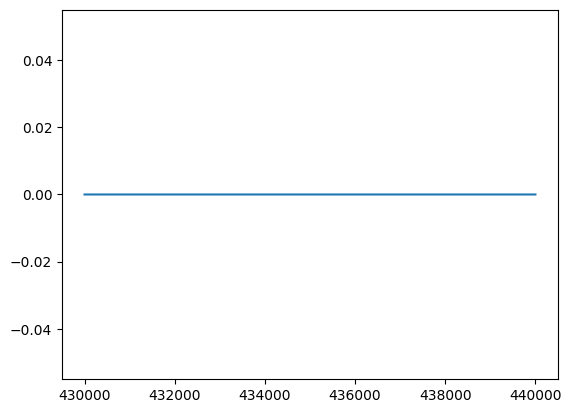

In [3]:
xConv = 64.6
yConv = 64.7
zMotor = concatDF['zMotor']

xRefBead1 = concatDF['xRefBead1']*xConv
yRefBead1 = concatDF['yRefBead1']*yConv
zRefBead1 = concatDF['zRefBead1']*1000

xRefBead2 = concatDF['xRefBead2']*xConv
yRefBead2 = concatDF['yRefBead2']*yConv
zRefBead2 = concatDF['zRefBead2']*1000

xExpBead1 = concatDF['xExpBead1']*xConv
yExpBead1 = concatDF['yExpBead1']*yConv
zExpBead1 = concatDF['zExpBead1']*1000

xExpBead2 = concatDF['xExpBead2']*xConv
yExpBead2 = concatDF['yExpBead2']*yConv
zExpBead2 = concatDF['zExpBead2']*1000

timeVector = pd.Series(range(len(zExpBead1)))/400

## Good beads
beadX = xExpBead1 - xRefBead1
beadY = yExpBead1 - yRefBead1
beadZ = zExpBead1 - zRefBead1  # REF BEAD IS ACTUALLY THE EXP BEAD

lowForceStart = 430000
lowForceEnd = 440000

highForceStart = 1000
highForceEnd = 32000

medForceStart = 37000
medForceEnd = 53000

plt.plot(zMotor[430000:440000])

The high force x-variance is:  89.11045887072751
The high force y-variance is:  356.4580366474701
The high force z-variance is:  6.429707885200308
The low force x-variance is:  1433.156471975199
The low force y-variance is:  19463.19867232105
The low force z-variance is:  543.2289973066321


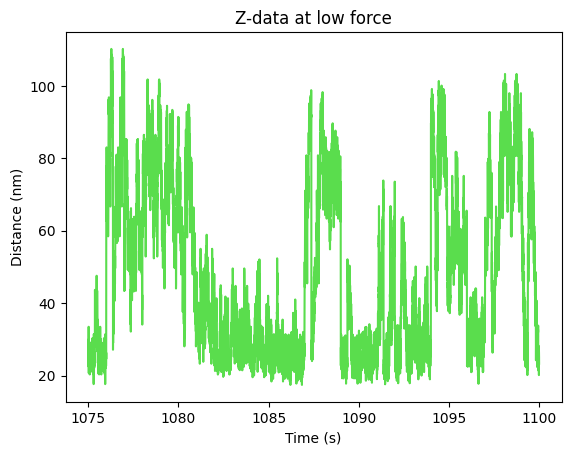

In [4]:
# ## High force
# fig1 = plt.plot(timeVector[highForceStart:highForceEnd], beadX[highForceStart:highForceEnd], color='#5ADD4D') 
# plt.title('Z-data at high force')
# plt.xlabel('Time (s)')
# plt.ylabel('Distance (nm)')

# the x axis has the lower variance so it is most likely the 

print('The high force x-variance is: ', np.var(beadX[highForceStart:highForceEnd]))
print('The high force y-variance is: ', np.var(beadY[highForceStart:highForceEnd]))
print('The high force z-variance is: ', np.var(beadZ[highForceStart:highForceEnd]))

## Low force
fig =  plt.plot(timeVector[lowForceStart:lowForceEnd],beadZ[lowForceStart:lowForceEnd], color = '#5ADD4D')
plt.title('Z-data at low force')
plt.xlabel('Time (s)')
plt.ylabel('Distance (nm)')

print('The low force x-variance is: ', np.var(beadX[lowForceStart:lowForceEnd]))
print('The low force y-variance is: ', np.var(beadY[lowForceStart:lowForceEnd]))
print('The low force z-variance is: ', np.var(beadZ[lowForceStart:lowForceEnd]))

The glass position is:  18.196000000000247


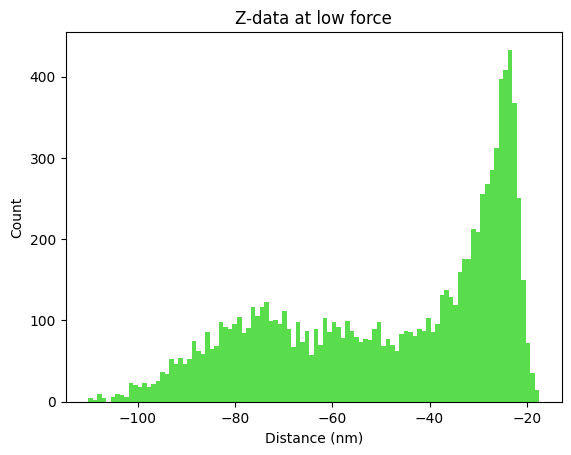

In [5]:
# Now we try and fiund the glass position
beadDiameter = 2800

plt.figure(1)
fig = plt.hist(-beadZ[lowForceStart:lowForceEnd], bins = 100, color='#5ADD4D')
plt.title('Z-data at low force')
plt.ylabel('Count')
plt.xlabel('Distance (nm)')

sortedZdata = np.sort(beadZ[lowForceStart:lowForceEnd])

glassPosition = np.mean(sortedZdata[0:30])
print('The glass position is: ', glassPosition)

tetherExtension = -beadZ + glassPosition + 60

Text(0.5, 0.01, 'Distance (nm)')

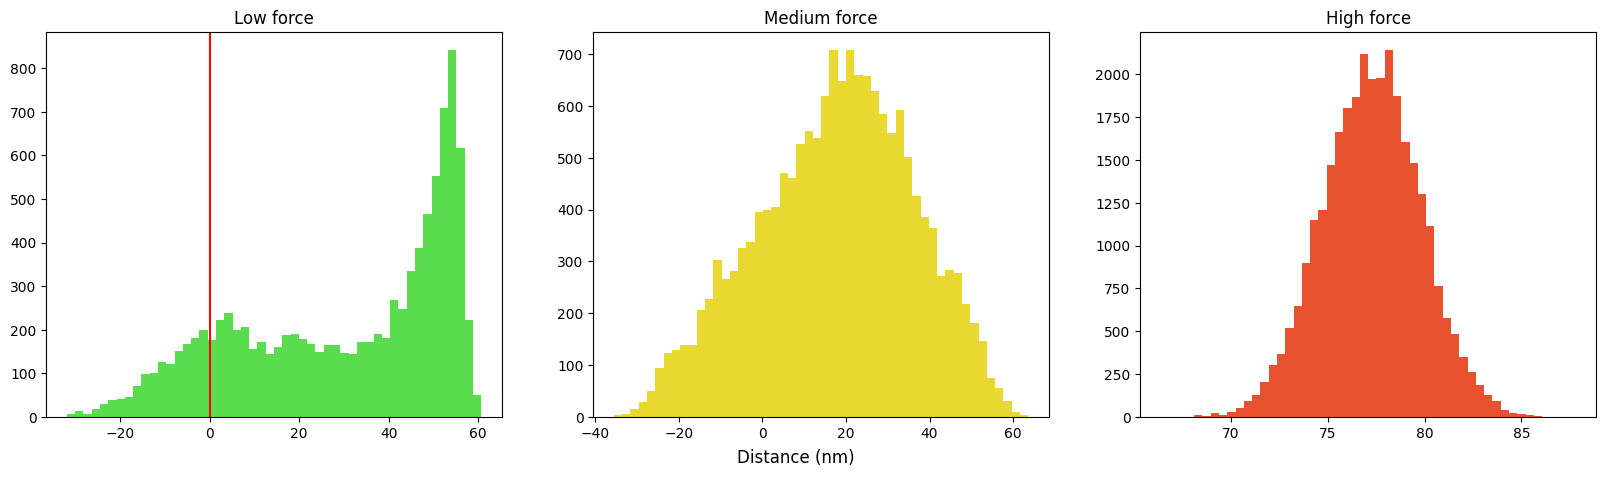

In [6]:
fig, ax = plt.subplots(1, 3, figsize = (20,5))
ax[0].hist(tetherExtension[lowForceStart:lowForceEnd], bins = 50, color='#5ADD4D')
ax[1].hist(tetherExtension[medForceStart:medForceEnd], bins = 50, color='#E9D82F')
ax[2].hist(tetherExtension[highForceStart:highForceEnd], bins = 50, color='#E9522F')
ax[0].set_title('Low force')
ax[1].set_title('Medium force')
ax[2].set_title('High force')
ax[0].axvline(x = 0, color = 'red')
fig.supxlabel('Distance (nm)')